<a href="https://colab.research.google.com/github/lilylydia/CoronaWatch-MobileApp/blob/master/TP3_Regression_Logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
# Des données pour tester les fonctions
# Testes unitaires
X_t = np.array([[2., -8.], [1., -2.], [1., 2.]])
Y_t = np.array([0., 1., 1.])
Theta_t = np.array([0.5, 0.25])
# une fonction qui normalise une matrice sur chaque colonne 
# dans l'entrainnement, on calcule les moyennes et les déviations de chaque colonne
# dans le teste, on ne doit pas recalculer ces deux paramètres. 
# Mais, on doit utiliser ceux calculés dans l'entrainnement
def normaliser(X, mean=None, std=None): 
    if (mean is None) or (std is None): 
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    X_norm = (X - mean)/std
    return X_norm, mean, std

#Résultat : 
#(array([[ 1.41421356, -1.29777137],
#        [-0.70710678,  0.16222142],
#        [-0.70710678,  1.13554995]]),
# array([ 1.33333333, -2.66666667]),
# array([0.47140452, 4.10960934]))
normaliser(X_t), normaliser(X_t, 1, 4)

((array([[ 1.41421356, -1.29777137],
         [-0.70710678,  0.16222142],
         [-0.70710678,  1.13554995]]),
  array([ 1.33333333, -2.66666667]),
  array([0.47140452, 4.10960934])),
 (array([[ 0.25, -2.25],
         [ 0.  , -0.75],
         [ 0.  ,  0.25]]), 1, 4))

In [126]:
# Préparer la matrice des caractéristiques pour l'entrainnement ou la prédiction
# On applique la normalisation sur chaque colonne (sauf si : norm=False)
# Ensuite on ajoute une colonne des 1 (sauf si : const=False)
def preparer(X, norm=True, const=True, mean=None, std=None): 
    X_pre = X.copy()
    if norm: 
        X_pre, mean, std = normaliser(X_pre)
    if const:
        X_pre = np.append(np.ones((X_pre.shape[0],1)), X_pre ,axis=1)
    return X_pre, mean, std
#Résulat : 

preparer(X_t), preparer(X_t, norm=False), preparer(X_t, const=False)

((array([[ 1.        ,  1.41421356, -1.29777137],
         [ 1.        , -0.70710678,  0.16222142],
         [ 1.        , -0.70710678,  1.13554995]]),
  array([ 1.33333333, -2.66666667]),
  array([0.47140452, 4.10960934])),
 (array([[ 1.,  2., -8.],
         [ 1.,  1., -2.],
         [ 1.,  1.,  2.]]), None, None),
 (array([[ 1.41421356, -1.29777137],
         [-0.70710678,  0.16222142],
         [-0.70710678,  1.13554995]]),
  array([ 1.33333333, -2.66666667]),
  array([0.47140452, 4.10960934])))

In [127]:
def generer_zeros_1(nbr):
    return np.zeros(nbr)

def generer_uns_1(nbr):
    return np.ones(nbr)

def generer_aleatoire_1(nbr):
    return np.random.rand(nbr)
    
generer_zeros_1(2), generer_uns_1(2), generer_aleatoire_1(2)

(array([0., 0.]), array([1., 1.]), array([0.76475171, 0.21766055]))

In [0]:
def afficher_2(X, Y, L=None, Y_labels=["Admis", "Non admis"], X_labels=["Note 1", "Note 2"]):
    oui = Y == 1
    plt.scatter(X[oui, 0], X[oui, 1], color="green", marker="o", label=Y_labels[0])
    plt.scatter(X[~oui, 0], X[~oui, 1], color="red", marker="x", label=Y_labels[1])
    if L is not None:
        x_values, y_values = L
        plt.plot(x_values, y_values, label="ligne de decision")
    plt.xlabel(X_labels[0])
    plt.ylabel(X_labels[1])
    plt.legend()
    plt.show()
    

In [0]:
def ligne_decision(X, Theta):
    X1 = [np.min(X[:,0]), np.max(X[:,0])]
    X2 = np.max(X[:,1])
    X2_min = X2 - (Theta[0] + Theta[1] * X1[0]) / Theta[2]
    X2_max = X2 - (Theta[0] + Theta[1] * X1[1]) / Theta[2]
    return X1, [X2_min, X2_max]

In [130]:
def z_1(X, Theta): 
      return np.dot(X, Theta)
  
#Résulat : array([-0.5,  0. ,  1.5])
z_1(X_t, Theta_t)

array([-1.,  0.,  1.])

In [131]:
# TODO La fonction ségmoid
# Elle doit fonctionner sur des scalaires ou des vecteurs de numpy
def sigmoid(X):
    # Fonction d'activation utilisée pour rendre les valeurs réelles entre 0 et 1 
    return 1 / (1 + np.exp(-X))

# résultat: (0.5, array([0.26894142, 0.73105858]))
sigmoid(0), sigmoid(np.array([-1, 1]))

(0.5, array([0.26894142, 0.73105858]))

In [133]:
def h_1(X, Theta, mean=None, std=None, const=False): 
    norm = (mean is not None) and (std is not None)
    X_pre, mean, std = preparer(X, norm, const, mean=mean, std=std)
    return sigmoid(z_1(X_pre, Theta))

# Résultat : array([0.26894142, 0.5       , 0.73105858])
h_1(X_t, Theta_t)

array([0.26894142, 0.5       , 0.73105858])

In [134]:
# TODO : La fonction de cout utilisée dans la régression logistique 
# H est la prédiction 
# Y est la valeur réel
def J_1(H, Y): 
    m = len(Y)
    epsilon = 1e-5
    cost = (1/m)*(((-Y).T @ np.log(H + epsilon))-((1-Y).T @ np.log(1-H + epsilon)))
    return cost
# Résultat : 0.4398901851987969
J_1(h_1(X_t, Theta_t), Y_t)

0.43987439946489093

In [135]:
# TODO: Définir la fonction de gradient :
def gradient_1(X, H, Y):
    m=X.shape[0]
    return (1/m) * np.dot(X.T,H - Y)

# Résultat : array([-0.07701953, -0.56313807])
gradient_1(X_t, h_1(X_t, Theta_t), Y_t)

array([-0.07701953, -0.56313807])

In [136]:
# TODO compléter cette fonction 
# H est un vecteur de probabilités 
def predire_1(H, seuil=0.5): 
        return np.round(H)

# Résultat : array([0, 1, 1])
predire_1(h_1(X_t, Theta_t))


array([0., 0., 1.])

In [137]:
# Puisque c'était fait en premier TP, la fonction est donnée 
# Ce n'ai pas la peine de modifier
def entrainer_1(X, Y, norm=True, const=True, nbr_iter=200, alpha=1., eps=0.01, 
                theta_func=generer_zeros_1, h_func=h_1, J_func=J_1, grad_func=gradient_1): 
    
    X_pre, mean, std = preparer(X, norm, const)
    Theta = theta_func(X_pre.shape[1])
    
    couts = []
    couts.append(J_func(h_func(X_pre, Theta), Y))
    
    for i in range(nbr_iter):
        H = h_func(X_pre, Theta)
        Theta -= alpha * grad_func(X_pre, H, Y)
        couts.append(J_func(H, Y))
    
    return Theta, mean, std, couts

theta1, mean1, std1, couts1 = entrainer_1(X_t, Y_t)

# Résultat : 
# (array([ 1.68948098, -2.97269188,  2.16631904]),
# array([ 1.33333333, -2.66666667]),
# array([0.47140452, 4.10960934]),
# 0.007583559780610472)
theta1, mean1, std1, couts1[-1]

(array([ 1.98675108, -3.42409929,  2.41978457]),
 array([ 1.33333333, -2.66666667]),
 array([0.47140452, 4.10960934]),
 0.0038279882414218804)

In [138]:
# ne modifier pas ici
class RegLogistique(object):
    
    def __init__(self, nbr_iter=100, alpha=1., theta_func=generer_zeros_1, norm=True, const=True): 
        self.nbr_iter = nbr_iter
        self.alpha = alpha
        self.theta_func = theta_func
        self.norm = norm
        self.const = const
    
    def entrainer(self, X, Y): 
        self.Theta, self.mean, self.std, self.couts = entrainer_1(X, Y, 
                                                                  nbr_iter=self.nbr_iter, 
                                                                  alpha=self.alpha, 
                                                                  theta_func=self.theta_func, 
                                                                  norm=self.norm, 
                                                                  const=self.const)
        
    # La prédiction
    # si prob=True elle rend un vecteur de probabilités
    # sinon elle rend une vecteur de 1 et 0
    def predire(self, X, prob=True, seuil=0.5):
        H = h_1(X, self.Theta, self.mean, self.std, self.const)
        if prob:
            return H
        return predire_1(H, seuil=seuil)

reg_lin = RegLogistique(const=False)
reg_lin.entrainer(X_t, Y_t)
reg_lin.predire(np.array([[2., -2.],[-1., 1.]]))

array([0.00205785, 0.99794215])

In [139]:
from google.colab import files
conn = files.upload()



In [0]:
notes = pd.read_csv("notes.csv")
notes.head()

,Note1,Note2,Admis
0,9.75,16.00,1
1,2.25,9.50,0
2,4.50,2.50,0
3,15.50,10.25,1
4,3.25,19.50,1


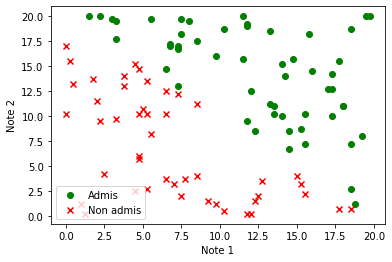

In [0]:
# Extraction des features 
X_notes = notes.iloc[:, :-1].values # Premières colonnes 

Y_notes = notes.iloc[:,-1].values # Dernière colonne 

afficher_2(X_notes, Y_notes)

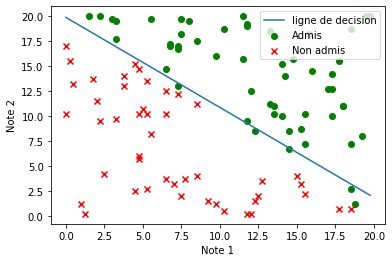

In [0]:
reg_notes = RegLogistique()
reg_notes.entrainer(X_notes, Y_notes)

line_decision = ligne_decision(X_notes, reg_notes.Theta)

afficher_2(X_notes, Y_notes, L=line_decision)

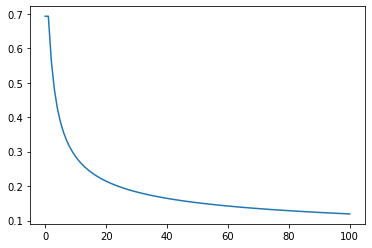

In [0]:
plt.plot(reg_notes.couts)

In [166]:
from google.colab import files
conn = files.upload()


Saving COVID19_line_list_data.csv to COVID19_line_list_data (3).csv


In [167]:
corona = pd.read_csv("COVID19_line_list_data.csv")
corona.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
corona.shape[0]
corona.isnull().sum() #pour voir les valeur null 

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 25              1085
Unnamed: 26              1085
dtype: int64

In [169]:
corona["death"].unique()

array(['0', '1', '2/14/2020', '2/26/2020', '2/13/2020', '2/28/2020',
       '2/27/2020', '2/25/2020', '2/23/2020', '2/24/2020', '2/22/2020',
       '02/01/20', '2/19/2020', '2/21/2020'], dtype=object)

In [170]:
corona["recovered"].unique()

array(['0', '1', '02/12/20', '1/15/2020', '12/30/1899', '02/08/20',
       '2/14/2020', '02/04/20', '2/18/2020', '02/05/20', '2/17/2020',
       '02/09/20', '2/15/2020', '2/27/2020', '2/19/2020', '2/20/2020',
       '1/17/2020', '02/07/20', '2/21/2020', '2/23/2020', '02/11/20',
       '2/22/2020', '2/16/2020', '2/24/2020', '2/26/2020', '2/25/2020',
       '02/06/20', '2/28/2020', '1/30/2020', '2/13/2020', '02/02/20',
       '1/31/2020'], dtype=object)

In [171]:
# TODO on veut garder seulement les échantillons où les patients sont rétablis (recovered) ou morts (death)

#corona = corona.loc[(corona['recovered'] == "1") | (corona['death'] == "1"),:]
corona =corona[(corona['recovered'] != '0') | (corona['death'] != '0')]
# Résultat : 222
corona.shape[0]

222

In [172]:
corona.filter(items=['country','age', 'recovered'])

,country,age,recovered
48,China,61.0,0
49,China,69.0,0
50,China,89.0,0
51,China,89.0,0
52,China,66.0,0
...,...,...,...
1032,Egypt,NaN,2/19/2020
1033,Iran,NaN,0
1034,Iran,NaN,0
1035,Iran,NaN,0


In [173]:
# on veut que les valeurs de "recovered" soient 1 ou 0
corona["recovered"] = corona["recovered"].map(lambda x: 0 if x == "0" else 1)

corona.isnull().sum()

id                         0
case_in_country           42
reporting date             0
Unnamed: 3               222
summary                    0
location                   0
country                    0
gender                    11
age                       19
symptom_onset             76
If_onset_approximated     77
hosp_visit_date           91
exposure_start           198
exposure_end             138
visiting Wuhan             0
from Wuhan                 0
death                      0
recovered                  0
symptom                  171
source                     0
link                       0
Unnamed: 21              222
Unnamed: 22              222
Unnamed: 23              222
Unnamed: 24              222
Unnamed: 25              222
Unnamed: 26              222
dtype: int64

In [174]:
# TODO filtrer les échantillons avec des valeurs (gender et age) nulles

corona.dropna(subset=["recovered", "age","country"], inplace=True)

corona.info()
# Les trois colonnes doivent avoir 203 non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 48 to 993
Data columns (total 27 columns):
id                       203 non-null int64
case_in_country          161 non-null float64
reporting date           203 non-null object
Unnamed: 3               0 non-null float64
summary                  203 non-null object
location                 203 non-null object
country                  203 non-null object
gender                   201 non-null object
age                      203 non-null float64
symptom_onset            143 non-null object
If_onset_approximated    142 non-null float64
hosp_visit_date          127 non-null object
exposure_start           20 non-null object
exposure_end             78 non-null object
visiting Wuhan           203 non-null int64
from Wuhan               203 non-null float64
death                    203 non-null object
recovered                203 non-null int64
symptom                  48 non-null object
source                   203 non-null obje

In [175]:
# On veut garder seulement les 3 premiers pays en question de nombre
corona["country"].value_counts()

Singapore      59
China          42
South Korea    28
Malaysia       19
Japan          17
Vietnam         8
Hong Kong       4
France          4
Australia       4
UAE             4
USA             3
Thailand        3
Phillipines     2
Canada          2
Taiwan          1
Sri Lanka       1
Nepal           1
UK              1
Name: country, dtype: int64

In [176]:
msk = corona["country"].isin(["Singapore", "China", "South Korea"])
corona = corona.loc[msk]
corona["country"].value_counts()

Singapore      59
China          42
South Korea    28
Name: country, dtype: int64

In [177]:
# Extraction des caractéristiques 
X_corona = corona.iloc[:, :-1].values # Premières colonnes 

Y_corona = corona.iloc[:,-1].values # Dernière colonne 

X_corona[:3, :]

array([[49, nan, '1/22/2020', nan,
        'Death from COVID-19 pneumonia in Wuhan: male, 61, symptom onset on 12/20/2019, hospitalized on 12/27/2019, death on 01/09/2020.',
        'Wuhan, Hubei', 'China', 'male', 61.0, '12/20/2019', 0.0,
        '12/27/2019', nan, nan, 0, 1.0, '1', 0, nan,
        'National Health Commission',
        'http://www.nhc.gov.cn/yjb/s3578/202001/5d19a4f6d3154b9fae328918ed2e3c8a.shtml',
        nan, nan, nan, nan, nan],
       [50, nan, '1/22/2020', nan,
        'Death from COVID-19 pneumonia in Wuhan: male, 69, symptom onset on 12/30/2020, hospitalized on 01/03/2020, death on 01/15/2020.',
        'Wuhan, Hubei', 'China', 'male', 69.0, '12/30/2019', 0.0,
        '01/03/20', nan, nan, 0, 1.0, '1', 0, nan,
        'National Health Commission',
        'http://www.nhc.gov.cn/yjb/s3578/202001/5d19a4f6d3154b9fae328918ed2e3c8a.shtml',
        nan, nan, nan, nan, nan],
       [51, nan, '1/22/2020', nan,
        'Death from COVID-19 pneumonia in Wuhan: male, 89, 

In [178]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

X_corona_pays = encoder.fit_transform(X_corona[:, 0].reshape(len(X_corona), 1))

X_corona_ordinal = np.concatenate((X_corona_pays, X_corona[:, 1].reshape((len(X_corona), 1))), axis=1)

X_corona_ordinal[:3, :]

array([[0.0, nan],
       [1.0, nan],
       [2.0, nan]], dtype=object)

In [179]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

X_corona_pays = encoder.fit_transform(X_corona[:, 0].reshape(len(X_corona), 1))

X_corona_onehot = np.concatenate((X_corona_pays, X_corona[:, 1].reshape((len(X_corona), 1))), axis=1)

X_corona_onehot[:10, :]

array([[1.0, 0.0, 0.0, ..., 0.0, 0.0, nan],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, nan],
       [0.0, 0.0, 1.0, ..., 0.0, 0.0, nan],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, nan],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, nan],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, nan]], dtype=object)

In [187]:
# Randomization des données pour marquer les 80% lignes
msk = np.random.rand(len(X_corona)) < 0.8 

Y_corona_train = np.array(Y_corona[msk], dtype=np.float32)
Y_corona_test = np.array(Y_corona[~msk], dtype=np.float32)

X_corona_ordinal_train = np.array(X_corona_ordinal[msk, :], dtype=np.float32)
X_corona_ordinal_test = np.array(X_corona_ordinal[~msk, :], dtype=np.float32)

X_corona_onehot_train = np.array(X_corona_onehot[msk, :], dtype=np.float32)
X_corona_onehot_test = np.array(X_corona_onehot[~msk, :], dtype=np.float32)
Y_corona_test

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


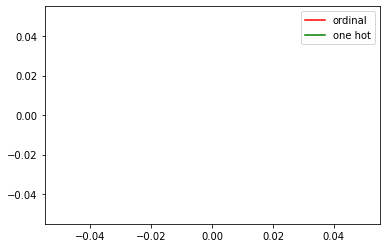

In [196]:
reg_corona_ordinal = RegLogistique()
reg_corona_onehot = RegLogistique()

# TODO compléter le  code afin d'entrainer deux modèles 
reg_corona_ordinal.entrainer(X_corona_ordinal_train, Y_corona_train)
reg_corona_onehot.entrainer(X_corona_onehot_train, Y_corona_train)



#Affichage des évolutions des couts 
plt.plot(reg_corona_ordinal.couts, color="red", label="ordinal")
plt.plot(reg_corona_onehot.couts, color="green", label="one hot")
plt.legend()
plt.show()

In [197]:
reg_corona_ordinal.Theta, reg_corona_onehot.Theta

(array([nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]))

In [208]:
# TODO compléter le test; ici, on veut la prédiction sous forme de 1 et 0 et pas des probabulités
# Le seuil est 0.5 (par défaut)

H_corona_ordinal_test = reg_corona_ordinal.predire(X_corona_ordinal_test)
H_corona_onehot_test = reg_corona_onehot.predire(X_corona_onehot_test)

# Afficher la somme des 1 pour chaque 
H_corona_ordinal_test.sum(), H_corona_onehot_test.sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


(nan, nan)

In [205]:
# TODO compléter les fonctions qui calculent la matrice de confusion 
def calculerTP(Y_reel, Y_predit): 
   for i in range(len(Y_predit)): 
       if Y_reel[i]==Y_predit[i]==1:
           TP += 1
   return TP

def calculerFN(Y_reel, Y_predit): 
    for i in range(len(Y_predit)): 
       if Y_predit[i]==0 and Y_reel[i]!=Y_predit[i]:
           FN += 1
    return FN

def calculerFP(Y_reel, Y_predit): 
    for i in range(len(Y_predit)): 
       if Y_predit[i]==1 and Y_reel[i]!=Y_predit[i]:
           FP += 1
    return FP

def calculerTN(Y_reel, Y_predit): 
   for i in range(len(Y_predit)): 
       if  Y_reel[i]==Y_predit[i]==0:
           TN += 1
   return TN

TP_corona_ordinal = calculerTP(Y_corona_test, H_corona_ordinal_test)
FN_corona_ordinal = calculerFN(Y_corona_test, H_corona_ordinal_test)
FP_corona_ordinal = calculerFP(Y_corona_test, H_corona_ordinal_test)
TN_corona_ordinal = calculerTN(Y_corona_test, H_corona_ordinal_test)

TN_corona_ordinal, FP_corona_ordinal, FN_corona_ordinal, TP_corona_ordinal

IndexError: ignored

In [209]:
# Pour vérifier votre solution 
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_corona_test, H_corona_ordinal_test).ravel()
tn, fp, fn, tp

ValueError: ignored

In [0]:
# TODO compléter les fonctions suivantes
def rappel(TN, FP, FN, TP): 
    return TP / (TP + FN)

def precision(TN, FP, FN, TP): 
    return TP / (TP + FP)